In [12]:
import json
import numpy as np

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

In [16]:
all_set_nums = [3,4,7,8,11,12]
na_location=20.1

In [ ]:
# Data Structure:
#   [row 1, ... row 5]
#       |
#   { set3, set4, ..., set12 }
#       |
#     [0p, 0p05, ..., 0p2]

# parameter - file pattern, with 0p0 carved out; with strategy tag carved out;


def load_in_IQR_of_json_data_and_report(fpath_median, fpath_25p, fpath_75p):
  pass
#   data_list_by_row = []
#   for i in range(1,6): # each row
#     row_tag = 'row%s' % i
#     one_row_data_by_set = {}
#     for j in [3,4,7,8,11,12]: # each set
#       set_tag = 'set%s' % j
#       one_row_data_by_set[set_tag] = [] # initialize
#     data_list_by_row.append(one_row_data_by_set)

In [20]:
def load_in_IQR_of_json_data_and_report(fpath_no_trail):
  
  def json_loader_and_processor(fpath):
    global na_location
    with open(fpath) as json_file:
      data = json.load(json_file)
    for i in range(1,6):
      tag = 'row%s'%i
      # convert to year after burn-in
      data[tag] = np.array(data[tag]) / 365 - 10
      # for -1's, manually move them to the right of x-axis
      data[tag] = np.where(data[tag]==np.inf, na_location, data[tag])
    return data
  
  data_median = json_loader_and_processor(fpath_no_trail + '_median.json')
  data_25p = json_loader_and_processor(fpath_no_trail + '_25p.json')
  data_75p = json_loader_and_processor(fpath_no_trail + '_75p.json')
  
  data_25p_delta = {}
  data_75p_delta = {}
  for i in range(1,6):
    tag = 'row%s'%i
    data_25p_delta[tag] = data_median[tag] - data_25p[tag]
    data_75p_delta[tag] = data_75p[tag] - data_median[tag]
  
  return (data_median, data_25p, data_75p, data_25p_delta, data_75p_delta)

In [21]:
mft0p0_median, mft0p0_25p, mft0p0_75p, mft0p0_25p_delta, mft0p0_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t1p_iqr/0p0/m'
)

mft0p05_median, mft0p05_25p, mft0p05_75p, mft0p05_25p_delta, mft0p05_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t1p_iqr/0p05/m'
)

mft0p1_median, mft0p1_25p, mft0p1_75p, mft0p1_25p_delta, mft0p1_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t1p_iqr/0p1/m'
)

mft0p15_median, mft0p15_25p, mft0p15_75p, mft0p15_25p_delta, mft0p15_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t1p_iqr/0p15/m'
)

mft0p2_median, mft0p2_25p, mft0p2_75p, mft0p2_25p_delta, mft0p2_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t1p_iqr/0p2/m'
)

In [22]:
for rownum in ['row1','row2','row3','row4','row5']:
  print('--- %s ---' % rownum)
  for idx,setnum in enumerate([3,4,7,8,11,12]):
    print('  set %s' % setnum)
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      'no iif', mft0p0_median[rownum][idx], mft0p0_25p[rownum][idx], mft0p0_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '5% iif', mft0p05_median[rownum][idx], mft0p05_25p[rownum][idx], mft0p05_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '10% iif', mft0p1_median[rownum][idx], mft0p1_25p[rownum][idx], mft0p1_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '15% iif', mft0p15_median[rownum][idx], mft0p15_25p[rownum][idx], mft0p15_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '20% iif', mft0p2_median[rownum][idx], mft0p2_25p[rownum][idx], mft0p2_75p[rownum][idx]
    ))
  print('----------')

--- row1 ---
  set 3
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   20.10 (  20.10-  20.10)
10% iif    =   20.10 (  18.60-  20.10)
15% iif    =   15.89 (  14.83-  17.93)
20% iif    =   13.26 (  12.26-  14.37)
  set 4
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   20.10 (  20.10-  20.10)
10% iif    =   18.02 (  16.83-  19.20)
15% iif    =   14.52 (  13.49-  16.00)
20% iif    =   12.10 (  11.26-  13.51)
  set 7
no iif     =   17.10 (  15.27-  18.54)
5% iif     =   13.97 (  13.08-  15.04)
10% iif    =   11.93 (  11.26-  12.60)
15% iif    =   10.01 (   9.51-  10.60)
20% iif    =    8.85 (   8.49-   9.68)
  set 8
no iif     =   15.56 (  14.83-  16.27)
5% iif     =   12.68 (  12.18-  13.02)
10% iif    =   10.60 (  10.10-  11.02)
15% iif    =    9.18 (   8.85-   9.51)
20% iif    =    8.18 (   7.85-   8.51)
  set 11
no iif     =    9.68 (   8.66-  10.45)
5% iif     =    8.34 (   7.91-   8.87)
10% iif    =    7.76 (   7.32-   8.10)
15% iif    =    6.89 (   6.59-   7.26)
20% iif   

In [49]:
def t01_iif_plotter_one_ax(ax, row_tag, set_idx): 
  yvalues_median = []
  yvalues_25pd = []
  yvalues_75pd = []
  # 0p0
  yvalues_median.append(mft0p0_median[row_tag][set_idx])
  yvalues_25pd.append(mft0p0_25p_delta[row_tag][set_idx])
  yvalues_75pd.append(mft0p0_75p_delta[row_tag][set_idx])
  # 0p05
  yvalues_median.append(mft0p05_median[row_tag][set_idx])
  yvalues_25pd.append(mft0p05_25p_delta[row_tag][set_idx])
  yvalues_75pd.append(mft0p05_75p_delta[row_tag][set_idx])
  # 0p1
  yvalues_median.append(mft0p1_median[row_tag][set_idx])
  yvalues_25pd.append(mft0p1_25p_delta[row_tag][set_idx])
  yvalues_75pd.append(mft0p1_75p_delta[row_tag][set_idx])
  # 0p15
  yvalues_median.append(mft0p15_median[row_tag][set_idx])
  yvalues_25pd.append(mft0p15_25p_delta[row_tag][set_idx])
  yvalues_75pd.append(mft0p15_75p_delta[row_tag][set_idx])
  # 0p2
  yvalues_median.append(mft0p2_median[row_tag][set_idx])
  yvalues_25pd.append(mft0p2_25p_delta[row_tag][set_idx])
  yvalues_75pd.append(mft0p2_75p_delta[row_tag][set_idx])
  
  ax.errorbar(
    range(1, 6), 
    yvalues_median, 
    yerr=[yvalues_25pd, yvalues_75pd], 
    fmt='o'
  )
  ax.set_xticks(np.arange(1,6, step=1))
  ax.set_xticklabels(['0%', '5%', '10%', '15%', '20%'])

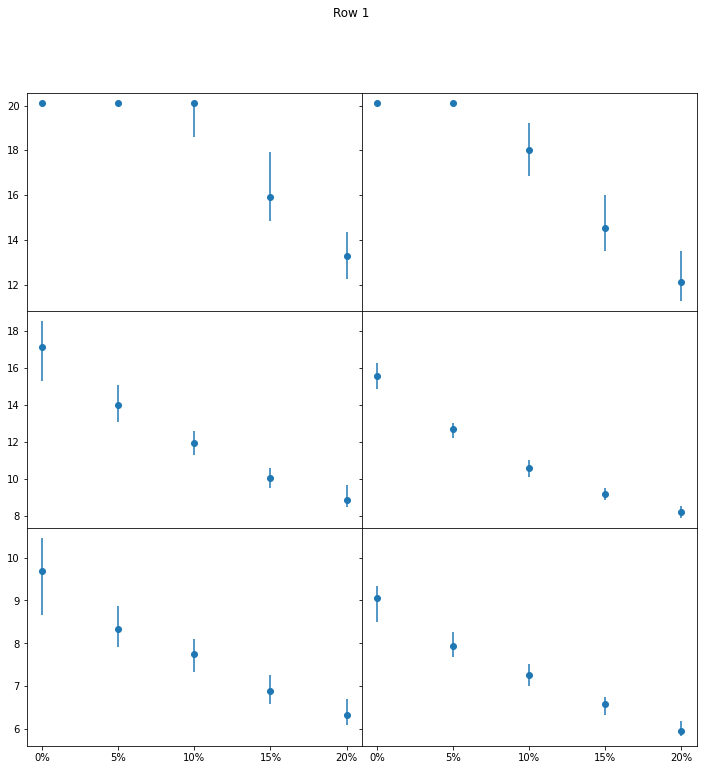

In [50]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

fig.suptitle('Row 1')
t01_iif_plotter_one_ax(ax1, 'row1', 0)
t01_iif_plotter_one_ax(ax2, 'row1', 1)
t01_iif_plotter_one_ax(ax3, 'row1', 2)
t01_iif_plotter_one_ax(ax4, 'row1', 3)
t01_iif_plotter_one_ax(ax5, 'row1', 4)
t01_iif_plotter_one_ax(ax6, 'row1', 5)

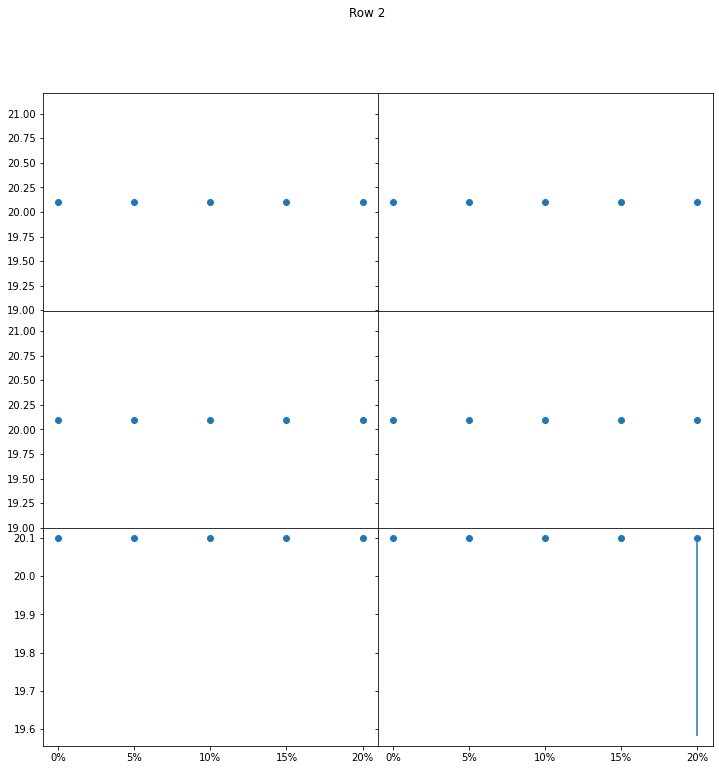

In [51]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

fig.suptitle('Row 2')
t01_iif_plotter_one_ax(ax1, 'row2', 0)
t01_iif_plotter_one_ax(ax2, 'row2', 1)
t01_iif_plotter_one_ax(ax3, 'row2', 2)
t01_iif_plotter_one_ax(ax4, 'row2', 3)
t01_iif_plotter_one_ax(ax5, 'row2', 4)
t01_iif_plotter_one_ax(ax6, 'row2', 5)

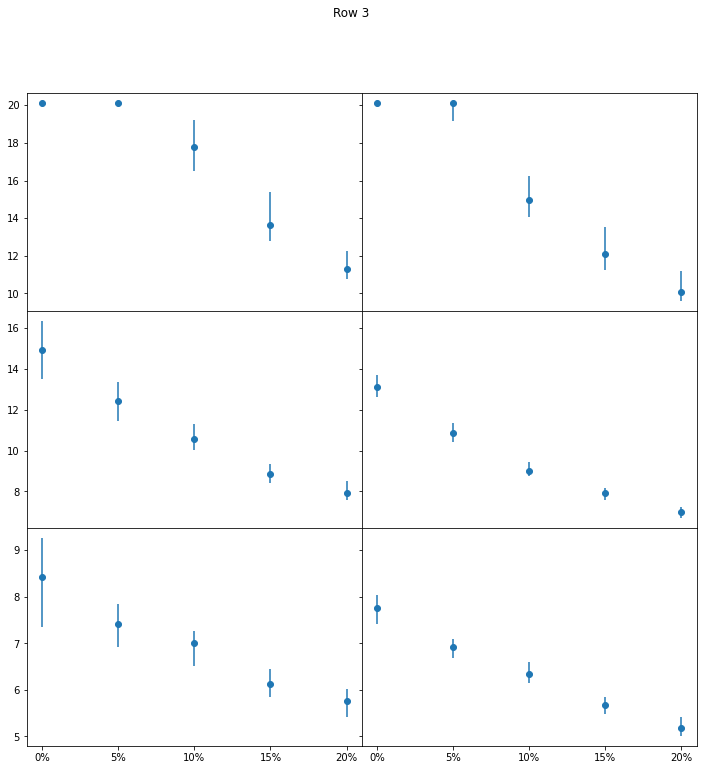

In [52]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

fig.suptitle('Row 3')
t01_iif_plotter_one_ax(ax1, 'row3', 0)
t01_iif_plotter_one_ax(ax2, 'row3', 1)
t01_iif_plotter_one_ax(ax3, 'row3', 2)
t01_iif_plotter_one_ax(ax4, 'row3', 3)
t01_iif_plotter_one_ax(ax5, 'row3', 4)
t01_iif_plotter_one_ax(ax6, 'row3', 5)

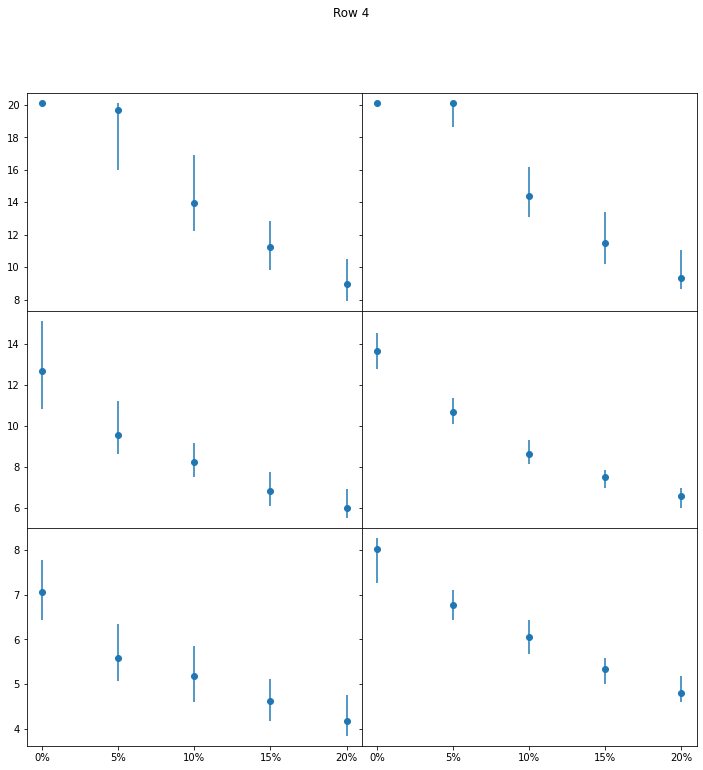

In [53]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

fig.suptitle('Row 4')
t01_iif_plotter_one_ax(ax1, 'row4', 0)
t01_iif_plotter_one_ax(ax2, 'row4', 1)
t01_iif_plotter_one_ax(ax3, 'row4', 2)
t01_iif_plotter_one_ax(ax4, 'row4', 3)
t01_iif_plotter_one_ax(ax5, 'row4', 4)
t01_iif_plotter_one_ax(ax6, 'row4', 5)

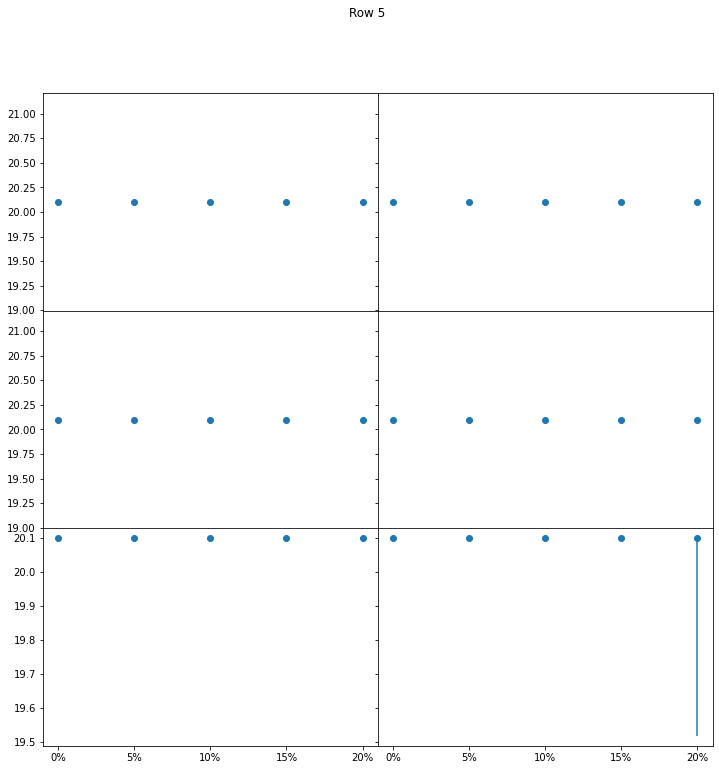

In [54]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axes

fig.suptitle('Row 5')
t01_iif_plotter_one_ax(ax1, 'row5', 0)
t01_iif_plotter_one_ax(ax2, 'row5', 1)
t01_iif_plotter_one_ax(ax3, 'row5', 2)
t01_iif_plotter_one_ax(ax4, 'row5', 3)
t01_iif_plotter_one_ax(ax5, 'row5', 4)
t01_iif_plotter_one_ax(ax6, 'row5', 5)